In [1]:
# Import of necessary liberaries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Datasets used for that study

house_df = pd.read_excel('/data/notebook_files/datasets/house.xls')
irates_df = pd.read_csv('/data/notebook_files/datasets/BOE.csv')

In [3]:
house_df

,"Table 11 Housing market: simple average house prices, by new/other dwellings, type of buyer and region, United Kingdom, from 1992 (quarterly) 1, 2, 3 (previously DCLG table 504)",Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,Unnamed: 10,Unnamed: 11,Unnamed: 12
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,New dwellings,NaN,Other dwellings4,NaN,All dwellings,NaN,First time buyers,NaN,Former owner occupiers
2,NaN,NaN,NaN,NaN,Price,NaN,Price,NaN,Price,NaN,Price,NaN,Price
3,NaN,NaN,NaN,NaN,£,NaN,£,NaN,£,NaN,£,NaN,£
4,United Kingdom,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2027,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2028,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2029,Contact:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Source: Regulated Mortgage Survey
2030,Telephone: 01633 456400,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
irates_df

,Date Changed,Rate
0,15 Dec 22,3.50
1,03 Nov 22,3.00
2,22 Sep 22,2.25
3,04 Aug 22,1.75
4,16 Jun 22,1.25
...,...,...
242,10 Mar 75,10.25
243,17 Feb 75,10.50
244,10 Feb 75,10.75
245,27 Jan 75,11.00


In [5]:
# Checking columns for empty rows

print("Missing values distribution:")
print(house_df.isnull().mean())
print("")

Missing values distribution:
Table 11 Housing market: simple average house prices, by new/other dwellings, type of buyer and  region, United Kingdom, from 1992 (quarterly) 1, 2, 3 (previously DCLG table 504)    0.980807
Unnamed: 1                                                                                                                                                                            0.753937
Unnamed: 2                                                                                                                                                                            0.031496
Unnamed: 3                                                                                                                                                                            1.000000
Unnamed: 4                                                                                                                                                                            0.037894
Unnamed: 5      

In [6]:
# 

house_df3 = house_df.drop(columns=['Unnamed: 3','Unnamed: 5','Unnamed: 7','Unnamed: 9','Unnamed: 11'])
house_df3 = house_df.rename (columns=
{'Table 11 Housing market: simple average house prices, by new/other dwellings, type of buyer and  region, United Kingdom, from 1992 (quarterly) 1, 2, 3 (previously DCLG table 504)' : 'Region',
 'Unnamed: 1': 'Year',  
 'Unnamed: 2' : 'Quarter',
 'Unnamed: 4' : 'New dwellings',
 'Unnamed: 6' : 'Other dwellings',
 'Unnamed: 8' : 'All dwellings',
 'Unnamed: 10' : 'First time buyers',
 'Unnamed: 12' : 'Former owner occupiers',
 })
house_df3 = house_df3.assign(Region=house_df3['Region'].shift(3))
house_df3['Year'] = house_df3['Year'].interpolate(method='pad', limit=3)

column_names = ('Year','New dwellings','Other dwellings','All dwellings','First time buyers','Former owner occupiers')

def covert_to_int(dataframe,name):
        return pd.to_numeric(dataframe[name],errors='coerce').fillna(0).astype(int)
        
for value in column_names:
    house_df3[value]=covert_to_int(house_df3,value)


house_df3.drop(np.r_[0:7,2019:2032], inplace=True)

columns = ['Region','Year','New dwellings','Other dwellings','All dwellings','First time buyers','Former owner occupiers' ]

for column in columns:
    house_df3[column] = house_df3[column].fillna("")
    
    
house_df3

,Region,Year,Quarter,Unnamed: 3,New dwellings,Unnamed: 5,Other dwellings,Unnamed: 7,All dwellings,Unnamed: 9,First time buyers,Unnamed: 11,Former owner occupiers
7,United Kingdom,1992,Q2,NaN,77360,NaN,60210,NaN,62255,NaN,46919,NaN,76988
8,K02000001,1992,Q3,NaN,69893,NaN,62513,NaN,63712,NaN,48578,NaN,79493
9,,1992,Q4,NaN,70043,NaN,57193,NaN,59230,NaN,44831,NaN,76992
10,,1993,Q1,NaN,72700,NaN,58345,NaN,60213,NaN,46300,NaN,77787
11,,1993,Q2,NaN,73289,NaN,60196,NaN,61895,NaN,48566,NaN,78151
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2014,,2021,Q3,NaN,202498,NaN,174913,NaN,179935,NaN,150733,NaN,220168
2015,,2021,Q4,NaN,197388,NaN,165070,NaN,171830,NaN,148031,NaN,215325
2016,,2022,Q1,NaN,215044,NaN,178526,NaN,184707,NaN,151759,NaN,239818
2017,,2022,Q2,NaN,225815,NaN,182400,NaN,190623,NaN,157540,NaN,246209


In [7]:
house_df_United_Kingdom = house_df3.loc[0:128]
house_df_Great_Britain = house_df3.loc[133:254]
house_df_England_Wales = house_df3.loc[295:381]
house_df_England = house_df3.loc[385:506]
house_df_North_East = house_df3.loc[511:632]
house_df_Yorkshire = house_df3.loc[763:884]
house_df_East_Midlands = house_df3.loc[889:1010]
house_df_West_Midlands = house_df3.loc[1015:1136]
house_df_East_England = house_df3.loc[1141:1262]
house_df_London = house_df3.loc[1267:1388]
house_df_South_East = house_df3.loc[1393:1514]
house_df_South_West = house_df3.loc[1519:1640]
house_df_Wales = house_df3.loc[1645:1766]
house_df_Scotland = house_df3.loc[1771:1892]
house_df_N_Ireland = house_df3.loc[1897:2018]

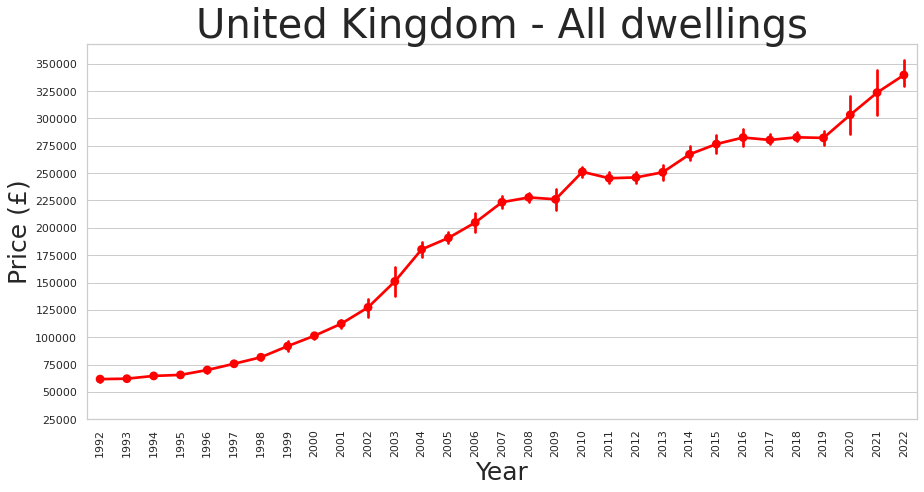

In [23]:
plt.figure(figsize=(13,7), layout='tight',facecolor='white')
sns.set_theme(style="whitegrid")

sns.pointplot(data=house_df_United_Kingdom, x='Year', y='All dwellings', color='Red')

plt.title("United Kingdom - All dwellings", size=40)
plt.xlabel("Year", fontsize=25)
plt.xticks(rotation=90)
plt.ylabel("Price (£)", fontsize=25)
plt.yticks(np.arange(25000,375000, step=25000))
plt.show()

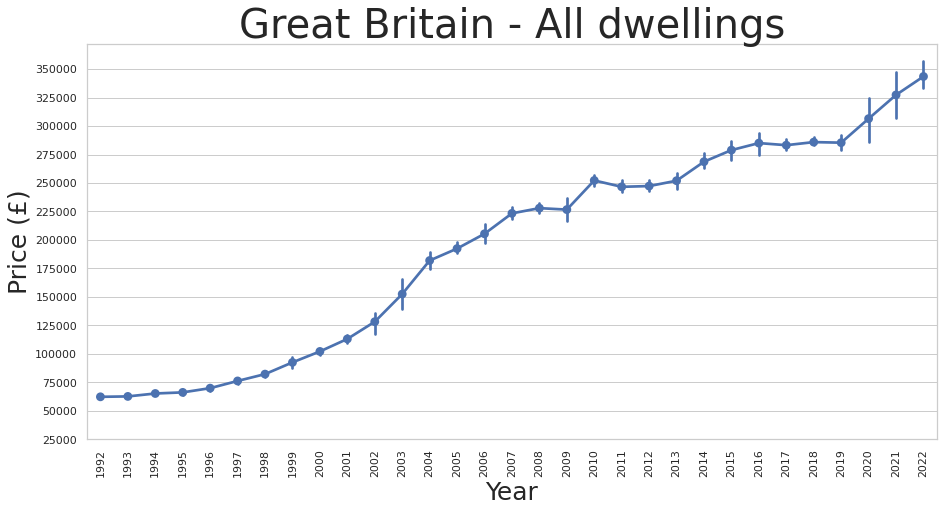

In [9]:
plt.figure(figsize=(13,7), layout='constrained', facecolor='white', edgecolor='black', frameon=True)
sns.set_theme(style="whitegrid")
sns.pointplot(data=house_df_Great_Britain, x='Year', y='All dwellings')

plt.title("Great Britain - All dwellings", size=40)
plt.xlabel("Year", fontsize=25)
plt.xticks(rotation=90)
plt.ylabel("Price (£)", fontsize=25)
plt.yticks(np.arange(25000,375000, step=25000))
plt.show()

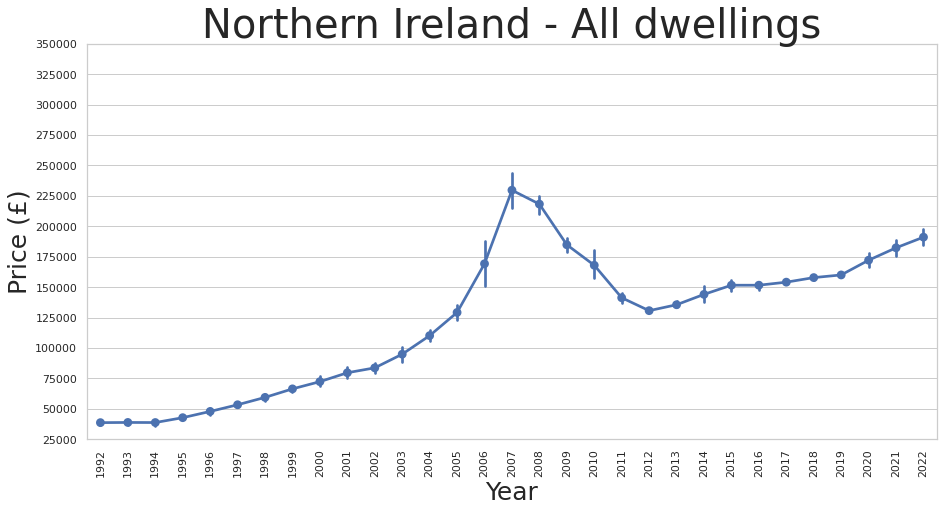

In [10]:
plt.figure(figsize=(13,7), layout='constrained', facecolor='white', edgecolor='black', frameon=True)
sns.set_theme(style="whitegrid")
sns.pointplot(data=house_df_N_Ireland, x='Year', y='All dwellings')

plt.title("Northern Ireland - All dwellings", size=40)
plt.xlabel("Year", fontsize=25)
plt.xticks(rotation=90)
plt.ylabel("Price (£)", fontsize=25)
plt.yticks(np.arange(25000,375000, step=25000))
plt.show()

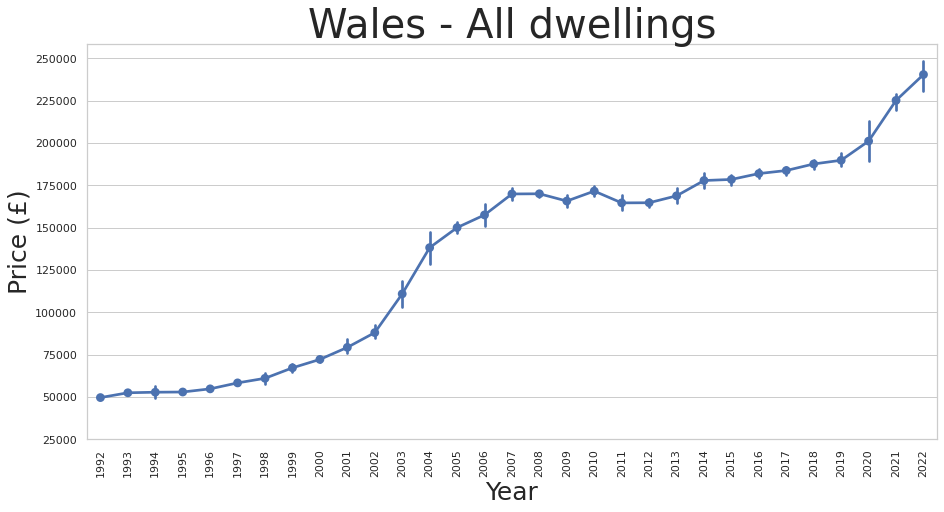

In [11]:
plt.figure(figsize=(13,7), layout='constrained', facecolor='white', edgecolor='black', frameon=True)
sns.set_theme(style="whitegrid")
sns.pointplot(data=house_df_Wales, x='Year', y='All dwellings')

plt.title("Wales - All dwellings", size=40)
plt.xlabel("Year", fontsize=25)
plt.xticks(rotation=90)
plt.ylabel("Price (£)", fontsize=25)
plt.yticks(np.arange(25000,275000, step=25000))
plt.show()

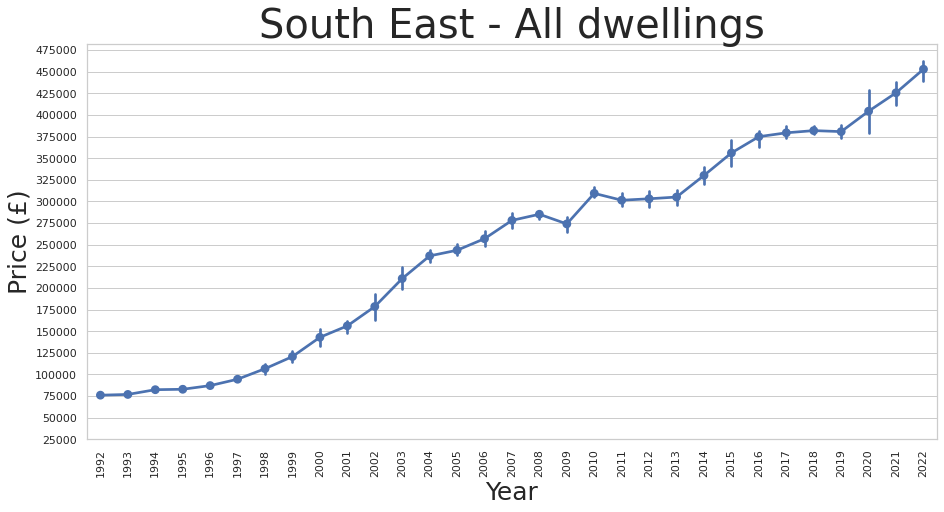

In [12]:
plt.figure(figsize=(13,7), layout='constrained', facecolor='white', edgecolor='black', frameon=True)
sns.set_theme(style="whitegrid")
sns.pointplot(data=house_df_South_East, x='Year', y='All dwellings')

plt.title("South East - All dwellings", size=40)
plt.xlabel("Year", fontsize=25)
plt.xticks(rotation=90)
plt.ylabel("Price (£)", fontsize=25)
plt.yticks(np.arange(25000,500000, step=25000))
plt.show()

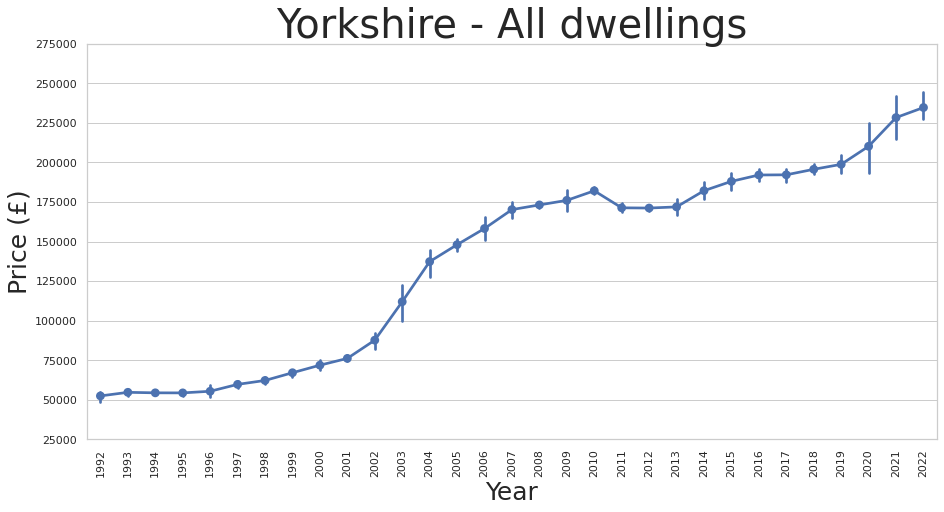

In [13]:
plt.figure(figsize=(13,7), layout='constrained', facecolor='white', edgecolor='black', frameon=True)
sns.set_theme(style="whitegrid")
sns.pointplot(data=house_df_Yorkshire, x='Year', y='All dwellings')

plt.title("Yorkshire - All dwellings", size=40)
plt.xlabel("Year", fontsize=25)
plt.xticks(rotation=90)
plt.ylabel("Price (£)", fontsize=25)
plt.yticks(np.arange(25000,300000, step=25000))
plt.show()

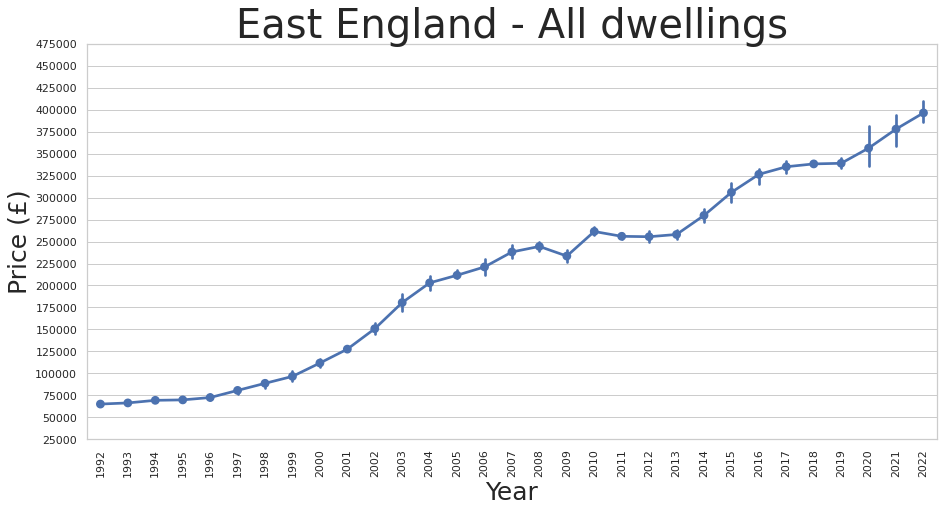

In [14]:
plt.figure(figsize=(13,7), layout='constrained', facecolor='white', edgecolor='black', frameon=True)
sns.set_theme(style="whitegrid")
sns.pointplot(data=house_df_East_England, x='Year', y='All dwellings')

plt.title("East England - All dwellings", size=40)
plt.xlabel("Year", fontsize=25)
plt.xticks(rotation=90)
plt.ylabel("Price (£)", fontsize=25)
plt.yticks(np.arange(25000,500000, step=25000))
plt.show()

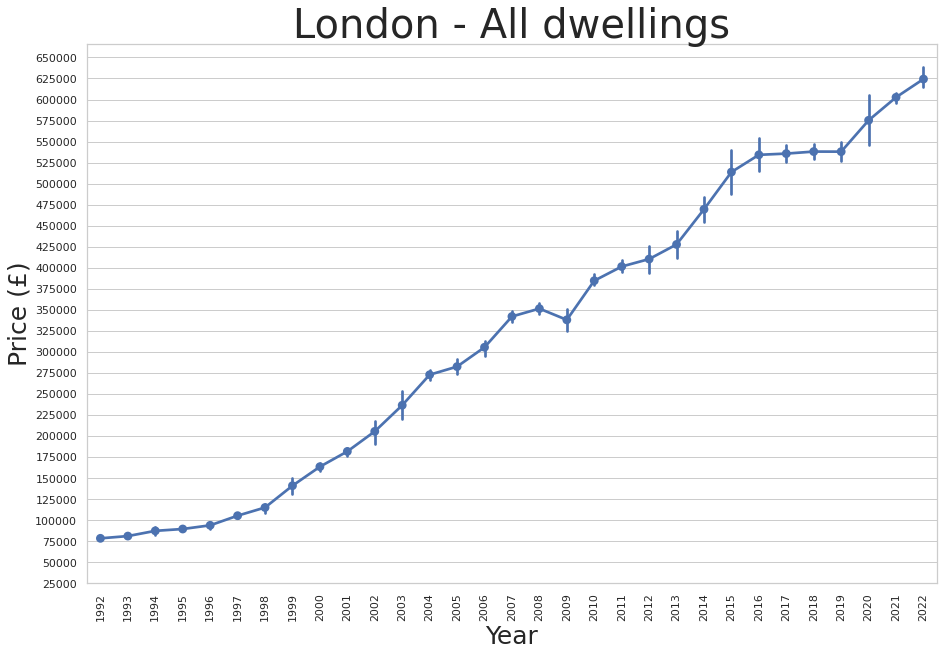

In [15]:
plt.figure(figsize=(13,9), layout='constrained', facecolor='white', edgecolor='black', frameon=True)
sns.set_theme(style="whitegrid")
sns.pointplot(data=house_df_London, x='Year', y='All dwellings')

plt.title("London - All dwellings", size=40)
plt.xlabel("Year", fontsize=25)
plt.xticks(rotation=90)
plt.ylabel("Price (£)", fontsize=25)
plt.yticks(np.arange(25000,675000, step=25000))
plt.show()

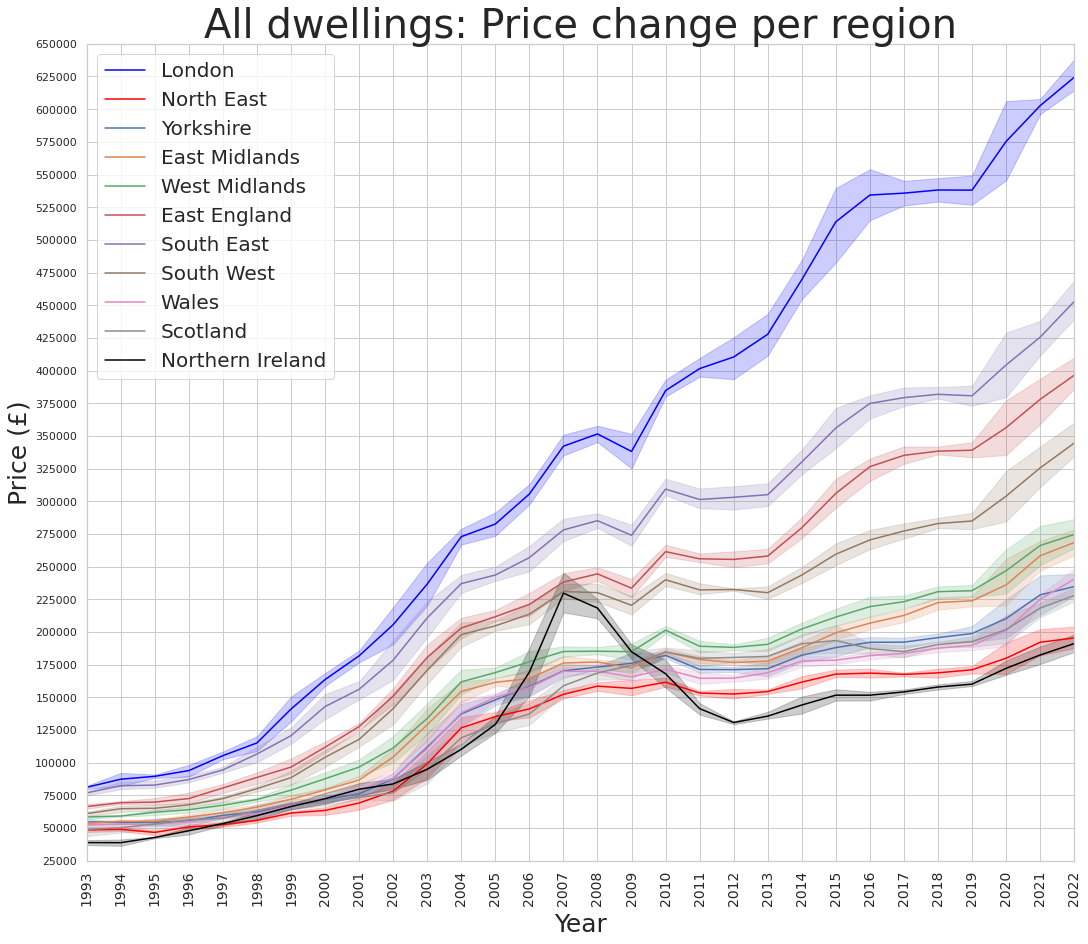

In [16]:
plt.figure(figsize=(15,13), layout='constrained', facecolor='white')
sns.set_theme(style="whitegrid")

sns.lineplot(data= house_df_London ,x="Year",y="All dwellings",legend='full', label='London', color='Blue')
sns.lineplot(data= house_df_North_East ,x="Year",y="All dwellings", label='North East' ,color='Red')
sns.lineplot(data= house_df_Yorkshire ,x="Year",y="All dwellings", label='Yorkshire' ,)
sns.lineplot(data= house_df_East_Midlands ,x="Year",y="All dwellings", label='East Midlands')
sns.lineplot(data= house_df_West_Midlands ,x="Year",y="All dwellings", label='West Midlands')
sns.lineplot(data= house_df_East_England ,x="Year",y="All dwellings", label='East England')
sns.lineplot(data= house_df_South_East ,x="Year",y="All dwellings", label='South East')
sns.lineplot(data= house_df_South_West ,x="Year",y="All dwellings", label='South West')
sns.lineplot(data= house_df_Wales ,x="Year",y="All dwellings", label='Wales')
sns.lineplot(data= house_df_Scotland ,x="Year",y="All dwellings", label='Scotland')
sns.lineplot(data= house_df_N_Ireland ,x="Year",y="All dwellings", label='Northern Ireland', color='Black')

plt.title("All dwellings: Price change per region", size=40)
plt.margins(x=-0.1, y=-0.1)
plt.legend(fontsize=20)
plt.xlabel("Year", fontsize=25, labelpad=7)
plt.xticks(np.arange(1993,2023,step=1), rotation=90,fontsize=14)
plt.ylabel("Price (£)", fontsize=25)
plt.yticks(np.arange(25000,675000, step=25000))
plt.show()

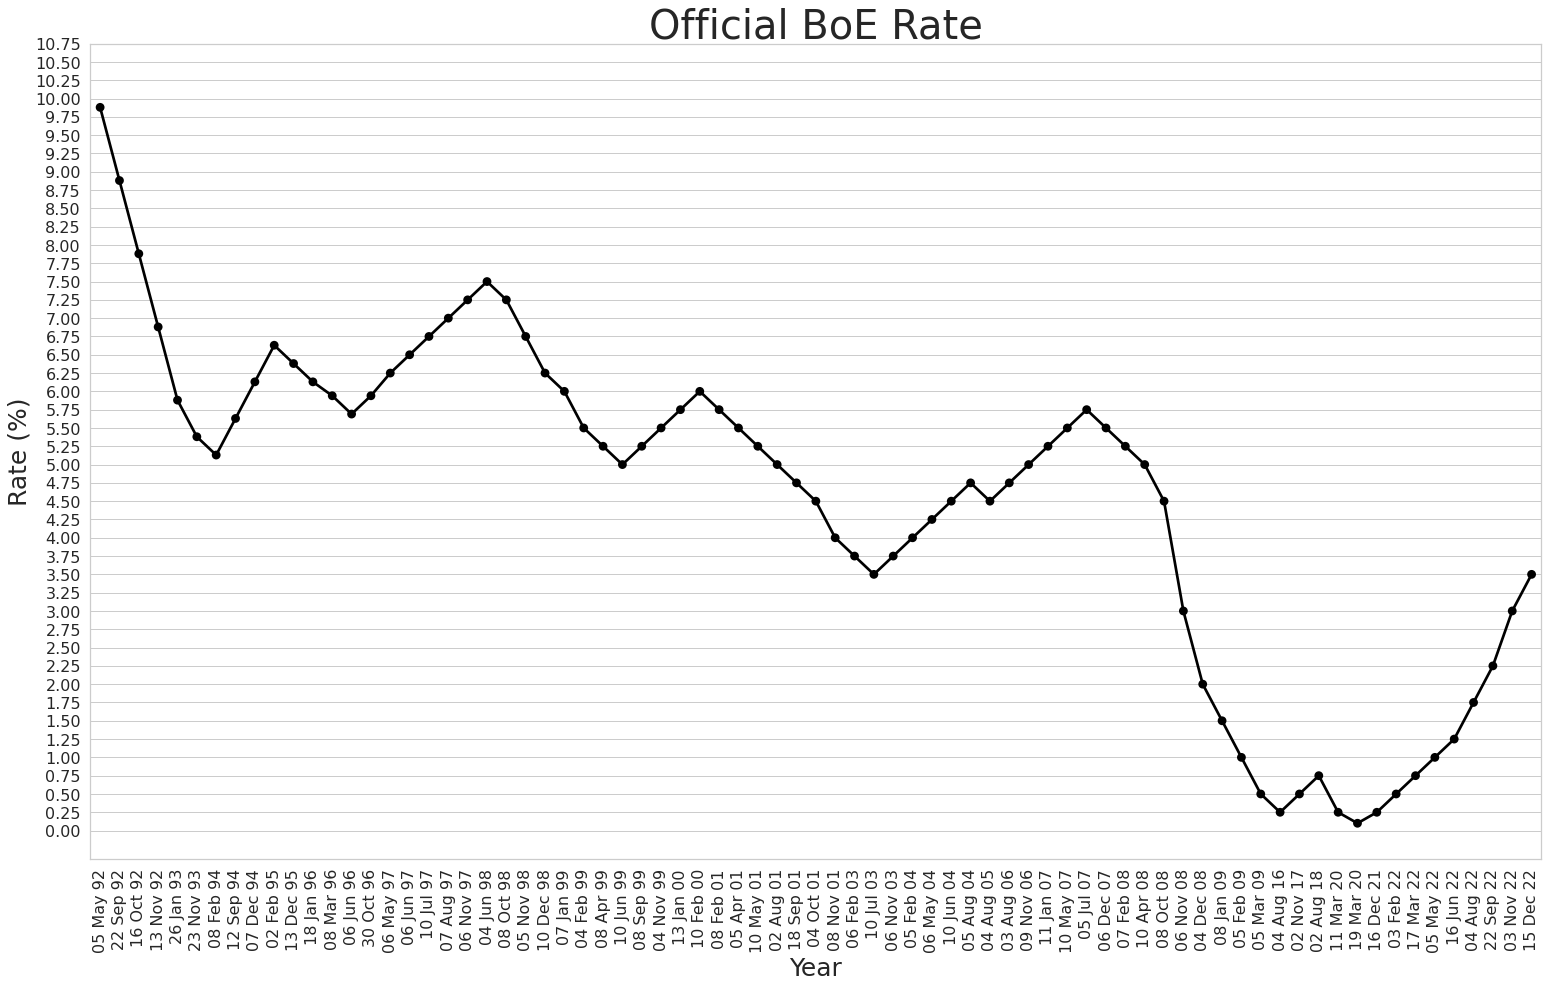

In [17]:
irates_df = irates_df.loc[0:74].sort_index(ascending=False)

sns.set_theme(style="whitegrid")
plt.figure(figsize=(26,15), facecolor='white')
sns.pointplot(data= irates_df ,x="Date Changed",y="Rate",color='Black')

plt.title("Official BoE Rate", size=40)
plt.xlabel("Year", fontsize=25, )
plt.ylabel("Rate (%)", fontsize=25)
plt.yticks(np.arange(0,11, step=0.25), fontsize=16)
plt.xticks(rotation=90, fontsize=16)
plt.show()

In [18]:

def average_price(df,col):
    return df[col].mean() 

print('London - Average price: ')
print(average_price(house_df_London,'All dwellings'))


def median_price(df,col):
    return df[col].median()


print('London - Median price: ')
print(median_price(house_df_London,'All dwellings'))





London - Average price: 
323030.2295081967
London - Median price: 
330103.5


In [19]:
def highest_price_info(df,col,col1,col2):
    max_price = df[col].max()
    column1 = df.loc[df[col] == max_price, col1].iloc[0]
    column2 = df.loc[df[col] == max_price, col2].iloc[0]
    print(col,max_price)
    print(col1,column1)
    print(col2,column2)
    return column1, column2, max_price

print('London - Highest price: ')
col1, col2, max_price = highest_price_info(house_df_London,'All dwellings','Year','Quarter')


London - Highest price: 
All dwellings 638125
Year 2022
Quarter Q3


In [20]:
def lowest_price_info(df,col,col1,col2):
    min_price = df[col].min()
    column1 = df.loc[df[col] == min_price, col1].iloc[0]
    column2 = df.loc[df[col] == min_price, col2].iloc[0]
    print(col,min_price)
    print(col1,column1)
    print(col2,column2)
    return column1, column2, min_price

print('London - Lowest price: ')
col1, col2, min_price = lowest_price_info(house_df_London,'All dwellings','Year','Quarter')

London - Lowest price: 
All dwellings 76040
Year 1992
Quarter Q4


In [21]:
def get_price(df,column, year, quarter):
    value = df.query("Year == {} and Quarter == '{}'".format(year, quarter))[column].values[0]
    return value

# Usage:
value = get_price(house_df_United_Kingdom,'All dwellings', 2012, 'Q2')
print(value)

244142


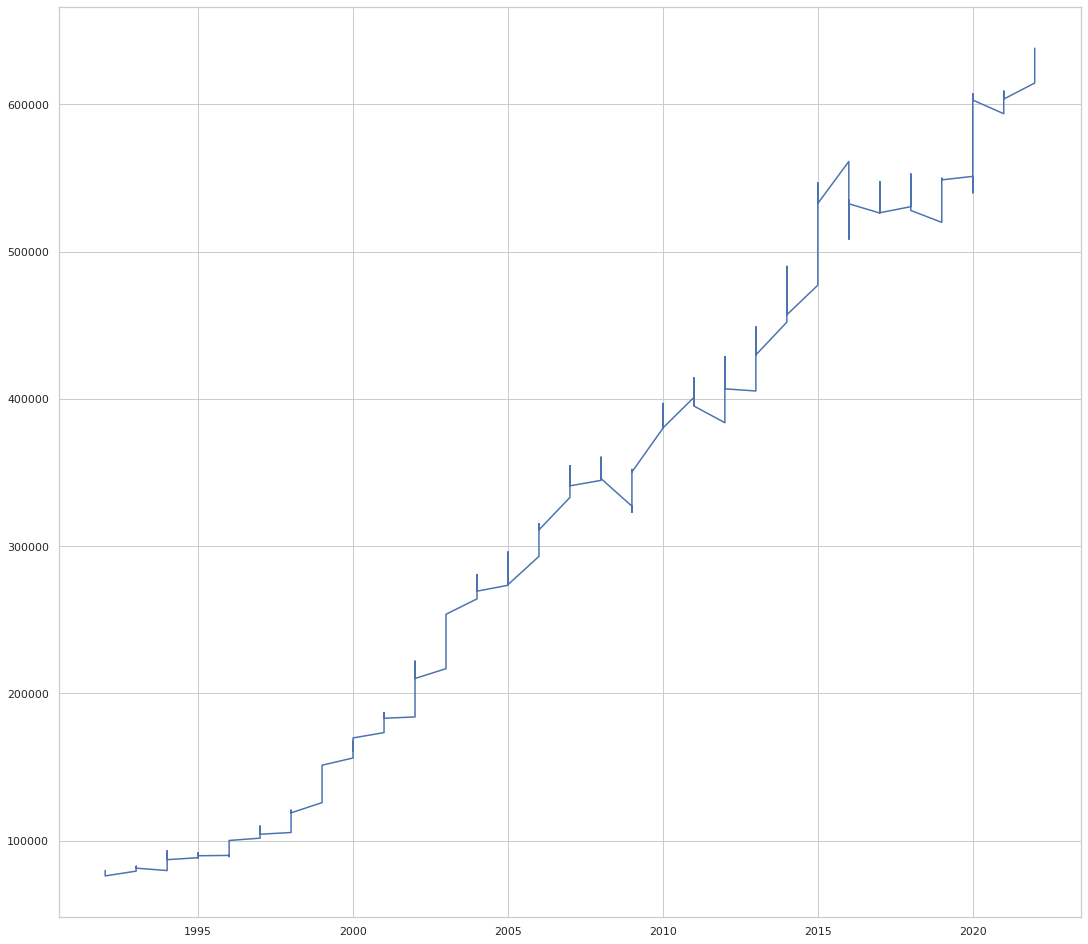

In [22]:
y = house_df_London['All dwellings']
x = house_df_London['Year']

plt.figure(figsize=(15,13), layout='constrained', facecolor='white')
plt.plot(x, y)
plt.show()